# Heart Attack Prediction Project 
## By Nihel Zaied

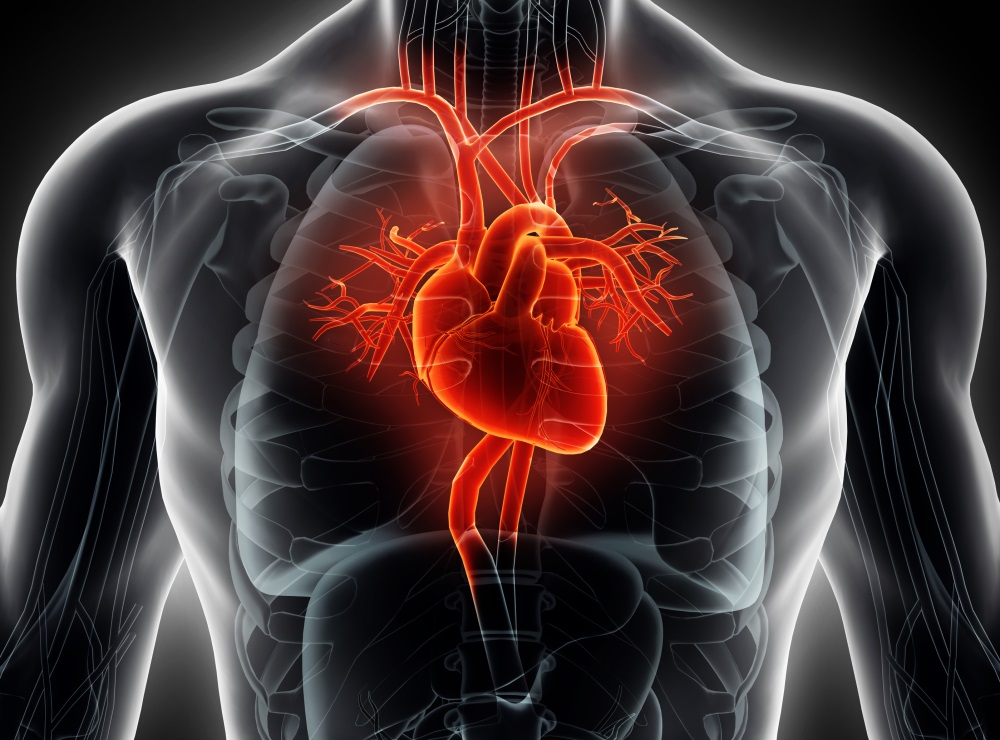

# Introduction :

In this project, we're diving into real-life data surrounding heart attacks, aiming to uncover patterns and gain a deeper understanding of this pervasive disease. Our goal is to develop predictive models using various machine learning algorithms. By meticulously analyzing this data, we're striving to identify key indicators that precede a heart attack. Ultimately, our aim is to create a reliable method for forecasting heart attacks, enabling early intervention and potentially saving lives.

<a id="preprocessing"></a>
# <p style="background-color:#de70af; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 1 | Import Libraries </p>

⬆️ [Tabel of Contents](#contents_tabel)

In [116]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from scipy.stats import boxcox
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import learning_curve



<a id="preprocessing"></a>
# <p style="background-color:#de70af; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 2 | Read the data </p>

⬆️ [Tabel of Contents](#contents_tabel)

In [67]:
data = pd.read_excel("C:/Users/Nihel ZAIED/Downloads/heart.xlsx")

In [68]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


| Variable | Description |
|----------|-------------|
| age      | Age of the patient in years |
| sex      | Gender of the patient (0 = male, 1 = female) |
| cp       | Chest pain type: <br> 0: Typical angina <br> 1: Atypical angina <br> 2: Non-anginal pain <br> 3: Asymptomatic |
| trestbps | Resting blood pressure in mm Hg |
| chol     | Serum cholesterol in mg/dl |
| fbs      | Fasting blood sugar level, categorized as above 120 mg/dl (1 = true, 0 = false) |
| restecg  | Resting electrocardiographic results: <br> 0: Normal <br> 1: Having ST-T wave abnormality <br> 2: Showing probable or definite left ventricular hypertrophy |
| thalach  | Maximum heart rate achieved during a stress test |
| exang    | Exercise-induced angina (1 = yes, 0 = no) |
| oldpeak  | ST depression induced by exercise relative to rest |
| slope    | Slope of the peak exercise ST segment: <br> 0: Upsloping <br> 1: Flat <br> 2: Downsloping |
| ca       | Number of major vessels (0-4) colored by fluoroscopy |
| thal     | Thalium stress test result: <br> 0: Normal <br> 1: Fixed defect <br> 2: Reversible defect <br> 3: Not described |
| target   | Heart disease status (0 = no disease, 1 = presence of disease) |


<a id="preprocessing"></a>
# <p style="background-color:#de70af; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 3 | Data Quality Cheak </p>

⬆️ [Tabel of Contents](#contents_tabel)

In [69]:
nan_percentage = (data.isnull().mean() * 100).round(2)
nan_percentage

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [71]:
data.duplicated().sum()

723

Here we will convertt some variables  like sex , cp , fbs,exang,slope , ca ,thal and target for proper analysis 

In [72]:
# Define the continuous features
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Identify the features to be converted to object data type
features_to_convert = [feature for feature in data.columns if feature not in continuous_features]

# Convert the identified features to object data type
data[features_to_convert] = data[features_to_convert].astype('object')

data.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

In [73]:
num_categorical = 0
num_numerical = 0

for col in data.columns:
    if data[col].dtype == 'object':  # Assuming 'object' dtype represents categorical variables
        num_categorical += 1
    else:
        num_numerical += 1

# Print the result
print("There are", num_categorical, "categorical variables and", num_numerical, "numerical variables in this dataset.")

There are 9 categorical variables and 5 numerical variables in this dataset.


In [74]:
# Initialize lists to store categorical and numerical variable names
categorical_variables = []
numerical_variables = []

# Count categorical and numerical variables
for col in data.columns:
    if data[col].dtype == 'object':
        categorical_variables.append(col)
    else:
        numerical_variables.append(col)

# Print the summary
print("Summary of Variables:")
print("----------------------")
print("There are", len(categorical_variables), "categorical variables and", len(numerical_variables), "numerical variables in this dataset.\n")

print("Categorical Variables:")
for cat_var in categorical_variables:
    print("-", cat_var)

print("\nNumerical Variables:")
for num_var in numerical_variables:
    print("-", num_var)

Summary of Variables:
----------------------
There are 9 categorical variables and 5 numerical variables in this dataset.

Categorical Variables:
- sex
- cp
- fbs
- restecg
- exang
- slope
- ca
- thal
- target

Numerical Variables:
- age
- trestbps
- chol
- thalach
- oldpeak


<a id="preprocessing"></a>
# <p style="background-color:#de70af; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 4 | EDA </p>

⬆️ [Tabel of Contents](#contents_tabel)

<b><span style='color:#b23272'>Step 4.1 | Categorical Variables Analysis </span></b>


Cheak the unique values of different categorical variables 

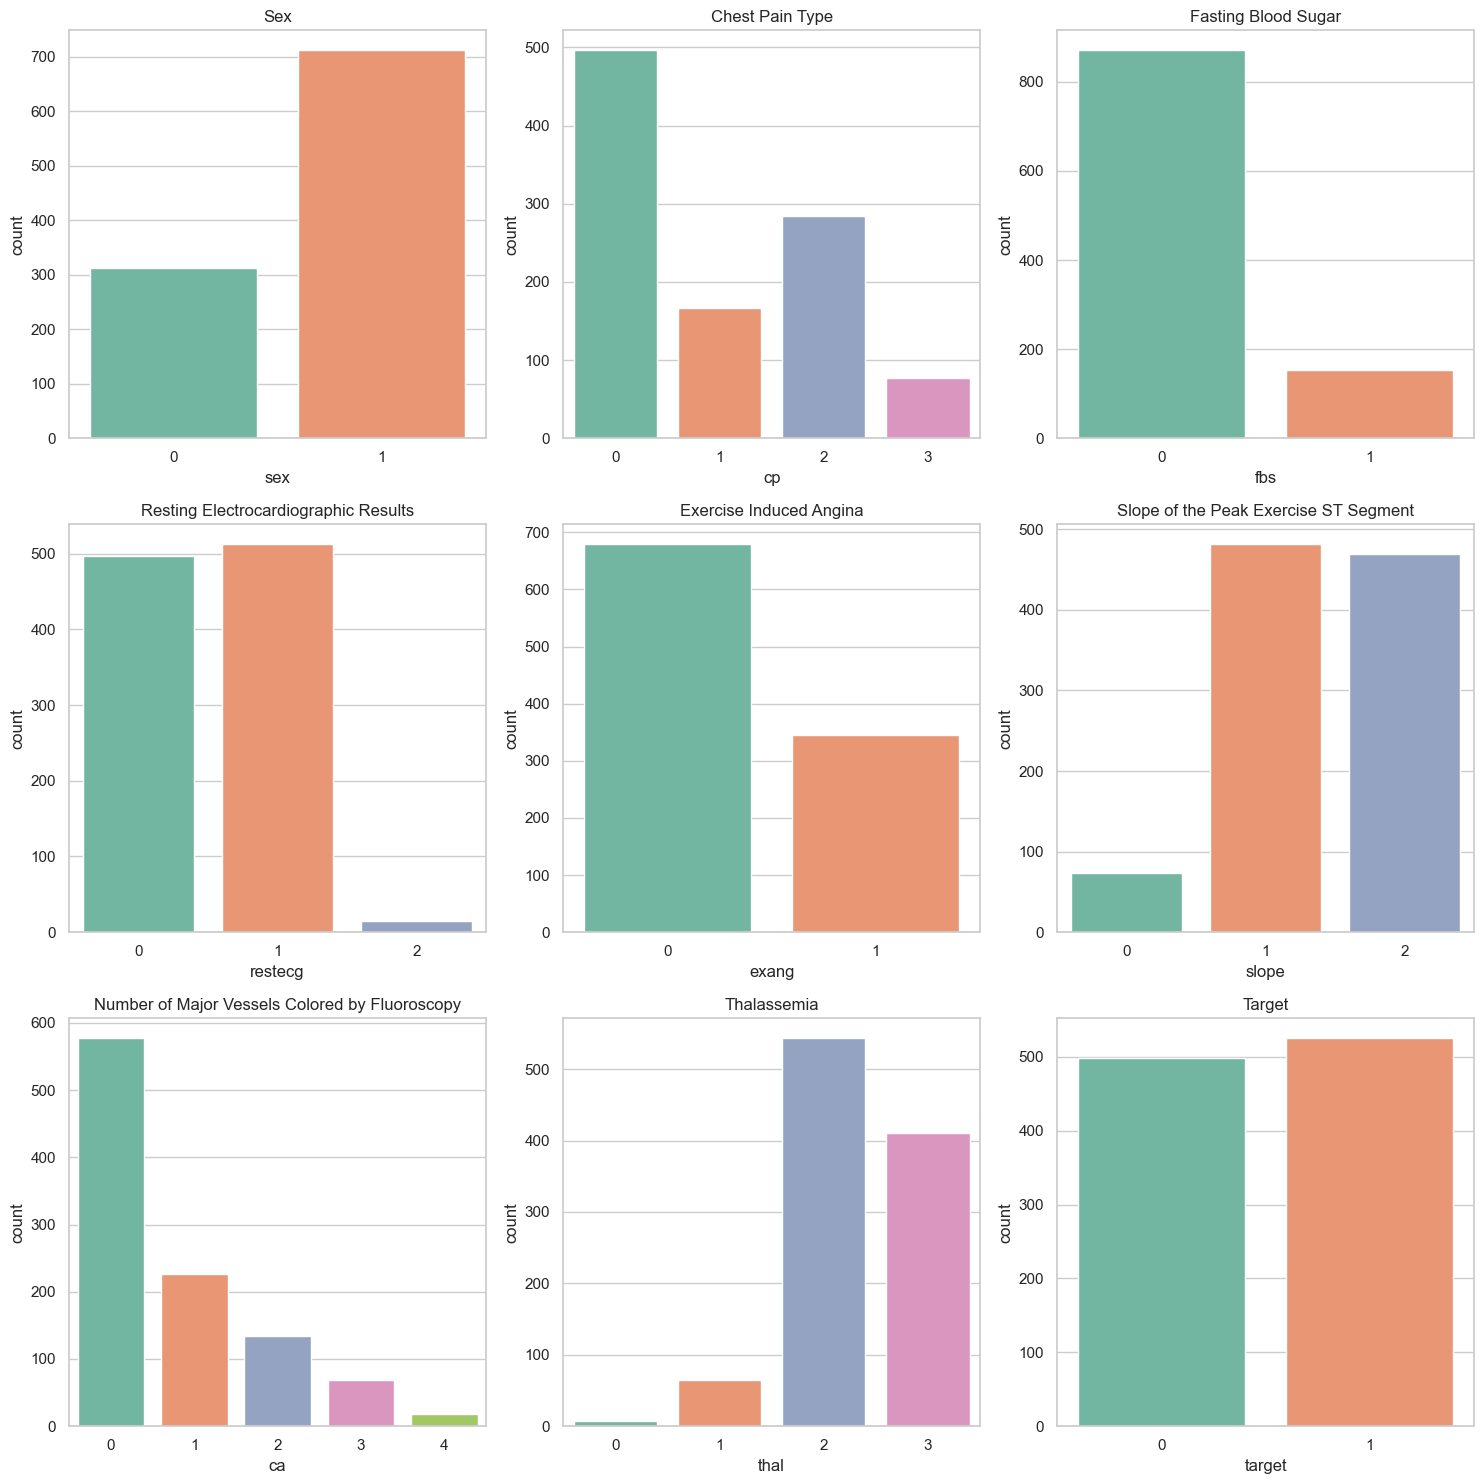

In [75]:
# Set the style of the seaborn plot
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Plot distributions for each variable
sns.countplot(ax=axes[0, 0], data=data, x='sex', palette='Set2')
axes[0, 0].set_title('Sex')

sns.countplot(ax=axes[0, 1], data=data, x='cp', palette='Set2')
axes[0, 1].set_title('Chest Pain Type')

sns.countplot(ax=axes[0, 2], data=data, x='fbs', palette='Set2')
axes[0, 2].set_title('Fasting Blood Sugar')

sns.countplot(ax=axes[1, 0], data=data, x='restecg', palette='Set2')
axes[1, 0].set_title('Resting Electrocardiographic Results')

sns.countplot(ax=axes[1, 1], data=data, x='exang', palette='Set2')
axes[1, 1].set_title('Exercise Induced Angina')

sns.countplot(ax=axes[1, 2], data=data, x='slope', palette='Set2')
axes[1, 2].set_title('Slope of the Peak Exercise ST Segment')

sns.countplot(ax=axes[2, 0], data=data, x='ca', palette='Set2')
axes[2, 0].set_title('Number of Major Vessels Colored by Fluoroscopy')

sns.countplot(ax=axes[2, 1], data=data, x='thal', palette='Set2')
axes[2, 1].set_title('Thalassemia')

sns.countplot(ax=axes[2, 2], data=data, x='target', palette='Set2')
axes[2, 2].set_title('Target')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


<b><span style='color:#b23272'>Step 4.2 | Numerical Variables Analysis </span></b>


#### Non-Binary variables

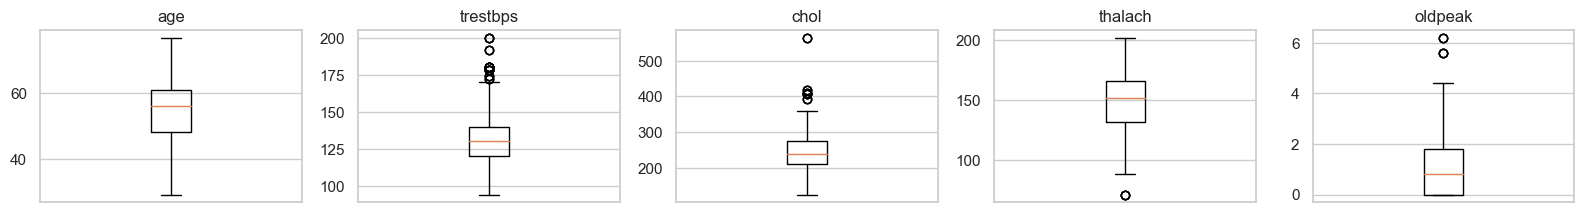

In [76]:
# Select only numerical variables for boxplot, excluding binary variables
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Plot boxplot for each numerical variable
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_data.columns):
    plt.subplot(5, 5, i+1)  # Adjust subplot layout
    plt.boxplot(numerical_data[col])
    plt.title(col)
    plt.xticks([])  # Remove x-axis ticks to save space

plt.tight_layout()
plt.show()


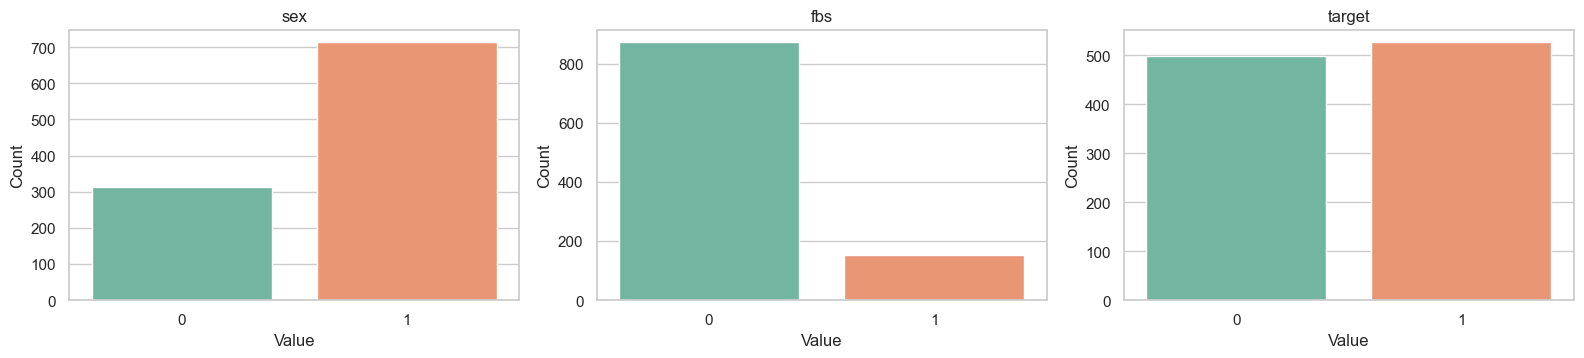

In [77]:
# Select only binary variables for histogram plot
binary_data = data[['sex', 'fbs', 'target']]

# Set style
sns.set(style="whitegrid")

# Plot histograms for each binary variable
plt.figure(figsize=(16, 10))
for i, col in enumerate(binary_data.columns):
    plt.subplot(3, 3, i+1)  # Adjust subplot layout
    sns.countplot(x=binary_data[col], palette="Set2")
    plt.title(col)
    plt.xlabel("Value")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


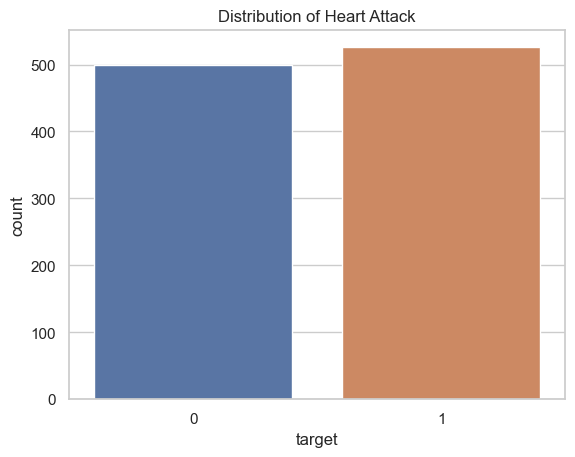

In [78]:
sns.countplot(x='target', data=data)
plt.title('Distribution of Heart Attack')
plt.show()

<a id="preprocessing"></a>
# <p style="background-color:#de70af; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5 | Data Preprocessing</p>

⬆️ [Tabel of Contents](#contents_tabel)

<b><span style='color:#b23272'>Step 5.1 | Outlier Treatment </span></b>


In [79]:
pur_numerical = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
pur_numerical

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [80]:
Q1 = data[pur_numerical].quantile(0.25)
Q3 = data[pur_numerical].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((data[pur_numerical] < (Q1 - 1.5 * IQR)) | (data[pur_numerical] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

age          0
trestbps    30
chol        16
thalach      4
oldpeak      7
dtype: int64

We must remove the outliers from the data set beacause there are so many models that are sensitive to the outliers , next we will try the transformationof box cox to reduce their effect

<b><span style='color:#b23272'>Step 5.2 | Categorical Features Encoding </span></b>


In [81]:
df=data.copy()

In [82]:

# Implementing one-hot encoding on the specified categorical features
df_encoded = pd.get_dummies(df, columns=['cp', 'restecg', 'thal'], drop_first=True)

# Convert the rest of the categorical variables that don't need one-hot encoding to integer data type
features_to_convert = ['sex', 'fbs', 'exang', 'slope', 'ca', 'target']
for feature in features_to_convert:
    df_encoded[feature] = df_encoded[feature].astype(int)

df_encoded.dtypes

age            int64
sex            int32
trestbps       int64
chol           int64
fbs            int32
thalach        int64
exang          int32
oldpeak      float64
slope          int32
ca             int32
target         int32
cp_1            bool
cp_2            bool
cp_3            bool
restecg_1       bool
restecg_2       bool
thal_1          bool
thal_2          bool
thal_3          bool
dtype: object

In [83]:
# Get the boolean columns
bool_cols = df_encoded.select_dtypes(include='bool').columns

# Convert boolean columns to integers (0 and 1)
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

# Display the encoded DataFrame
df_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,2,2,0,0,0,0,1,0,0,0,1
1,53,1,140,203,1,155,1,3.1,0,0,0,0,0,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,0,0,0,0,0,1,0,0,0,1
3,61,1,148,203,0,161,0,0.0,2,1,0,0,0,0,1,0,0,0,1
4,62,0,138,294,1,106,0,1.9,1,3,0,0,0,0,1,0,0,1,0


<b><span style='color:#b23272'>Step 5.2 | Transforming Skewed Features </span></b>


In [84]:
# Define the features (X) and the output labels (y)
X = df_encoded.drop('target', axis=1)
y = df_encoded['target'] 

In [85]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [86]:
pur_numerical

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

We add 0.001 to ensure all values are positive because box cox ensure that all the values must be positive

In [87]:
# Adding a small constant to 'oldpeak' to make all values positive
X_train['oldpeak'] = X_train['oldpeak'] + 0.001
X_test['oldpeak'] = X_test['oldpeak'] + 0.001

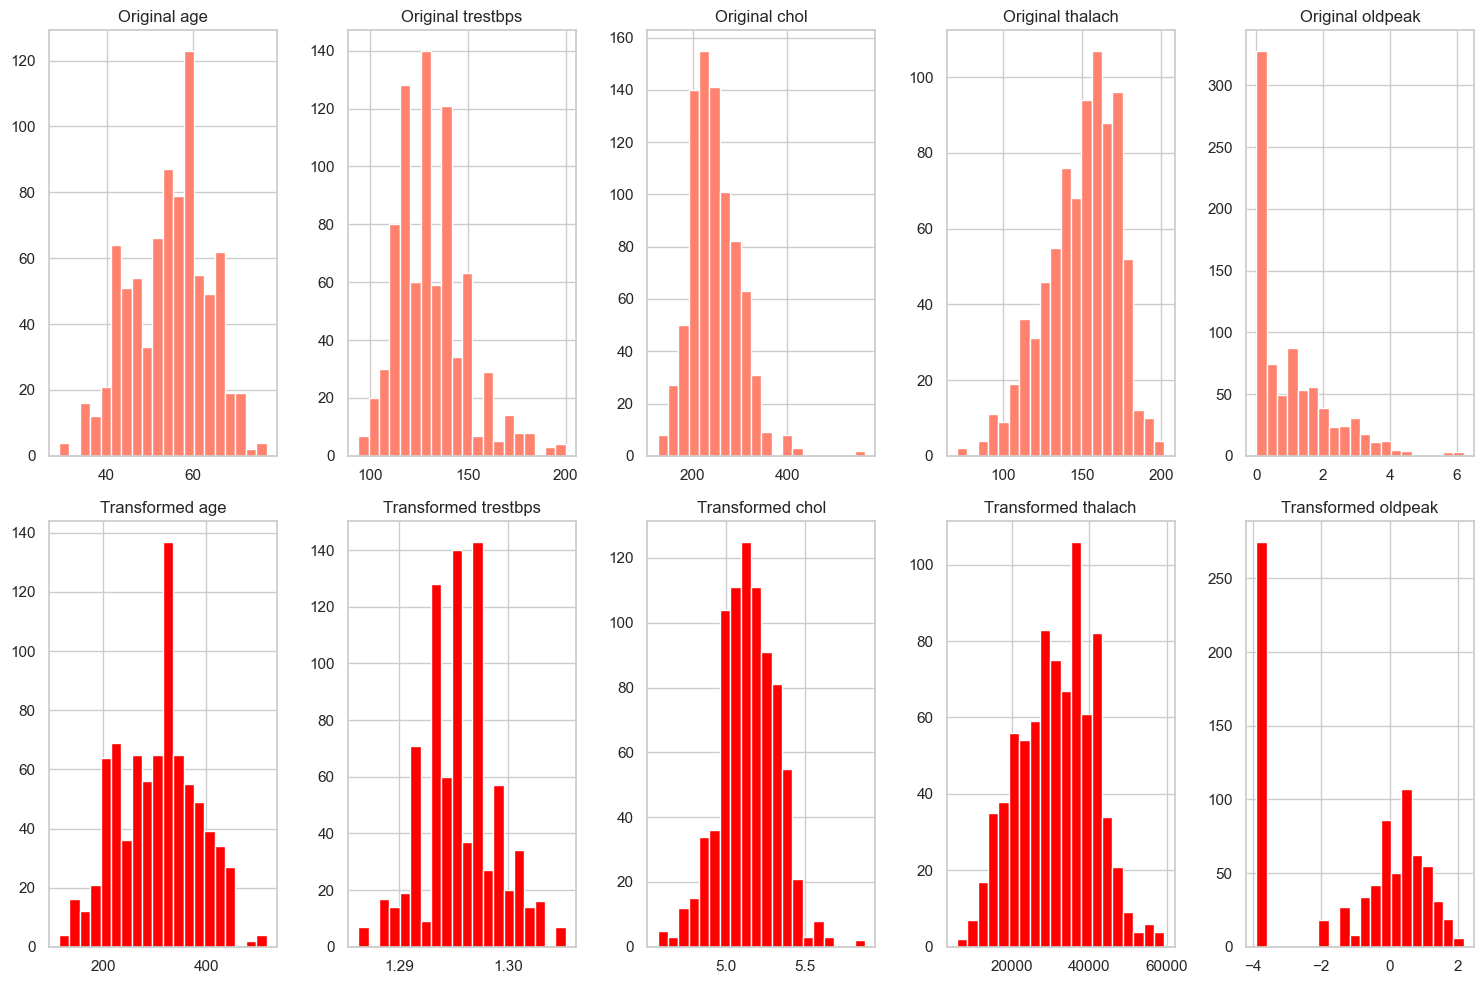

In [88]:
# Checking the distribution of the continuous features
fig, ax = plt.subplots(2, 5, figsize=(15,10))

# Original Distributions
for i, col in enumerate(pur_numerical):
    ax[0,i].hist(X_train[col], bins=20, color='#ff826e')
    ax[0,i].set_title(f'Original {col}')
    

# Applying Box-Cox Transformation
# Dictionary to store lambda values for each feature
lambdas = {}

for i, col in enumerate(pur_numerical):
    # Only apply box-cox for positive values
    if X_train[col].min() > 0:
        X_train[col], lambdas[col] = boxcox(X_train[col])
        # Applying the same lambda to test data
        X_test[col] = boxcox(X_test[col], lmbda=lambdas[col]) 
        ax[1,i].hist(X_train[col], bins=20, color='red')
        ax[1,i].set_title(f'Transformed {col}')
    else:
        ax[1,i].hist(X_train[col], bins=20, color='green')
        ax[1,i].set_title(f'{col} (Not Transformed)')

fig.tight_layout()
plt.show()

1- age: The transformation has made the age distribution more symmetric, bringing it closer to a normal distribution.

2- Trestbps: The distribution of trestbps post-transformation appears to be more normal-like, with reduced skewness.

3- Chol: After applying the Box-Cox transformation, chol exhibits a shape that's more aligned with a normal distribution.

4- Thalach: The thalach feature was already fairly symmetric before the transformation, and post-transformation, it continues to show a similar shape, indicating its original distribution was close to normal.

5- Oldpeak: The transformation improved the oldpeak distribution, but it still doesn't perfectly resemble a normal distribution. This could be due to the inherent nature of the data or the presence of outliers. To enhance its normality, we could consider utilizing advanced transformations such as the Yeo-Johnson transformation, which can handle zero and negative values directly.

<a id="dt"></a>
# <p style="background-color:#de70af; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 6 | Decision Tree Model Building</p>

⬆️ [Tabel of Contents](#contents_tabel)

<b><span style='color:#b23272'>Step 6.1 | Feature Scaling </span></b>


In [89]:
# Define the features (X) and the output labels (y)
X = df_encoded.drop('target', axis=1)
y = df_encoded['target'] 

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(820, 18) (820,)
(205, 18) (205,)


In [91]:
from sklearn.preprocessing import StandardScaler

# Instanciation de l'objet StandardScaler
scaler = StandardScaler()

# Normalisation des données d'entraînement
X_train_scaled = scaler.fit_transform(X_train)

# Normalisation des données de test en utilisant les mêmes paramètres que pour les données d'entraînement
X_test_scaled = scaler.transform(X_test)


<b><span style='color:#b23272'>Step 6.2 | DT Base Model Definition </span></b>


In [92]:
# Define the base DT model
dt_base = DecisionTreeClassifier(random_state=0)
dt_base.fit(X_train_scaled, y_train)


DecisionTreeClassifier(random_state=0)

In [93]:
def tune_clf_hyperparameters(clf, param_grid, X_train_scaled, y_train, scoring='recall', n_splits=3):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid. 
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters. 
    The combination with the highest recall for class 1 is selected as the default scoring metric. 
    The function returns the classifier with the optimal hyperparameters.
    '''
    
    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train_scaled, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_
    
    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters

In [94]:
# Hyperparameter grid for DT
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2]
}

In [95]:
# Call the function for hyperparameter tuning
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, X_train_scaled, y_train)
print('DT Optimal Hyperparameters: \n', best_dt_hyperparams)

DT Optimal Hyperparameters: 
 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


<b><span style='color:#b23272'>Step 6.3 | DT Model Evaluation </span></b>


In [96]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_dt.predict(X_train_scaled)))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       391
           1       0.89      0.83      0.86       429

    accuracy                           0.86       820
   macro avg       0.86      0.86      0.86       820
weighted avg       0.86      0.86      0.86       820



Cela signifie que le modèle prédit correctement la classe pour 85 % de toutes les observations.

In [97]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_dt.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       108
           1       0.83      0.81      0.82        97

    accuracy                           0.83       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.83      0.83      0.83       205



L'exactitude globale du modèle est de 83 %. Cela indique que le modèle prédit correctement la classe pour 83 % de toutes les observations.

<b><span style='color:#b23272'>Step 6.4 | Plot of DT  </span></b>


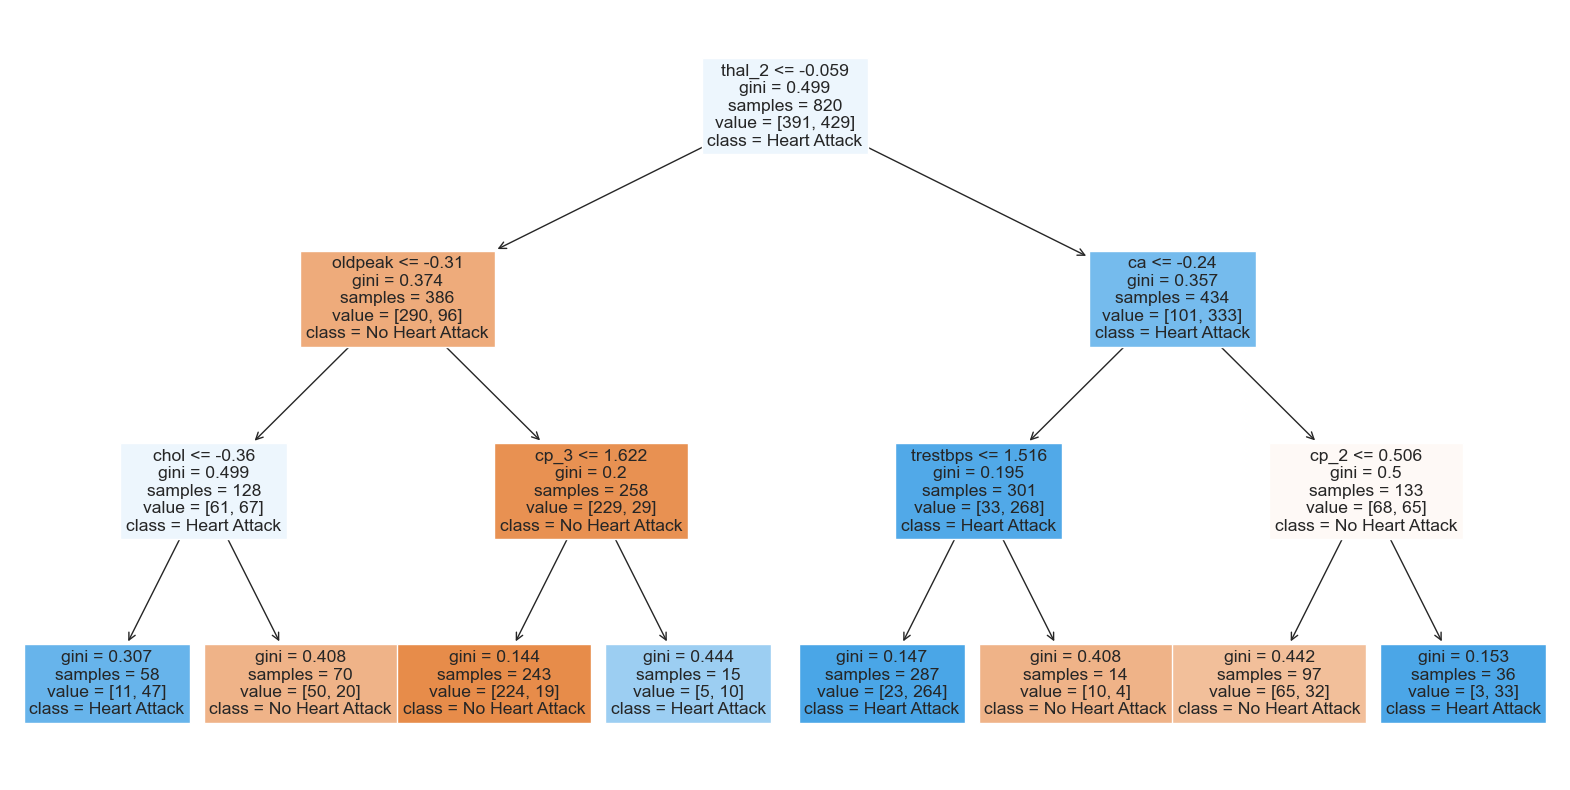

In [98]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(best_dt, feature_names=df_encoded.drop('target', axis=1).columns, class_names=["No Heart Attack", "Heart Attack"], filled=True)
plt.show()

As the decision tree splits the data, the Gini impurity steadily diminishes, indicating improved class separation. Reduced Gini values imply clearer distinctions between classes at each node, aiming for nodes dominated by a single class as the tree progresses, ultimately striving for maximum purity where most data points align with one class.

<b><span style='color:#b23272'>Step 6.5 | Plot of DT  </span></b>


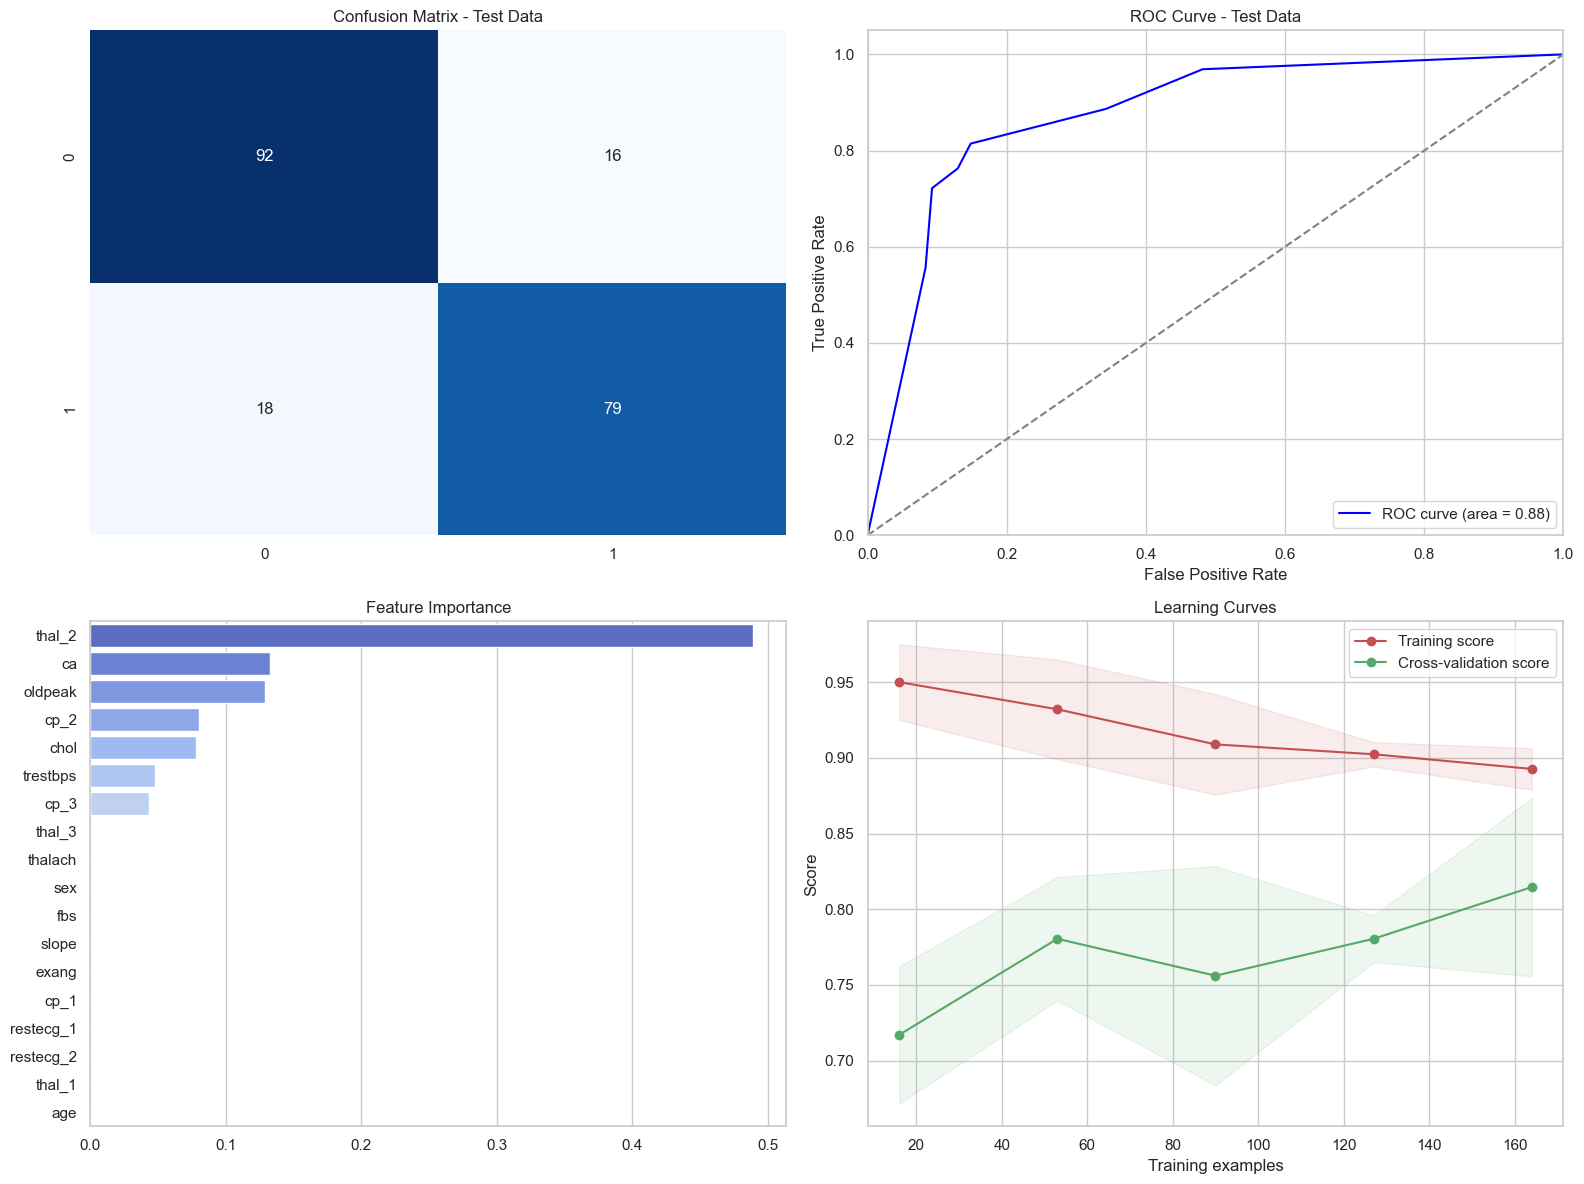

In [128]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Define the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot confusion matrix for test data
cm_test = confusion_matrix(y_test, best_dt.predict(X_test_scaled))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0, 0])
axes[0, 0].set_title('Confusion Matrix - Test Data')

# Plot ROC curve for test data
fpr_test, tpr_test, _ = roc_curve(y_test, best_dt.predict_proba(X_test_scaled)[:,1])
roc_auc_test = auc(fpr_test, tpr_test)
axes[0, 1].plot(fpr_test, tpr_test, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_test)
axes[0, 1].plot([0, 1], [0, 1], color='grey', linestyle='--')
axes[0, 1].set_xlim([0.0, 1.0])
axes[0, 1].set_ylim([0.0, 1.05])
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('ROC Curve - Test Data')
axes[0, 1].legend(loc="lower right")

# Plot feature importances
importances = best_dt.feature_importances_
indices = np.argsort(importances)[::-1]
sns.barplot(x=importances[indices], y=X_test.columns[indices], palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Feature Importance')

# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(best_dt, X_test_scaled, y_test, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
axes[1, 1].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1, color="r")
axes[1, 1].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
axes[1, 1].plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
axes[1, 1].plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
axes[1, 1].set_title("Learning Curves")
axes[1, 1].set_xlabel("Training examples")
axes[1, 1].set_ylabel("Score")
axes[1, 1].legend(loc="best")

plt.tight_layout()
plt.show()


The confusion matrix  shows perfect performance (TP=98, FP=0, FN=0, TN=107) which aligns with the AUC of 1.0 in the ROC curve. This suggests that the decision tree model perfectly classified all cases in the test data set according to heart attack risk.
The most important feature for the model is feature 2 (thal 2) ,other important features include oldpeak, ca, and cp. These features likely play a significant role in the decision tree's heart attack risk assessment process.

<a id="dt"></a>
# <p style="background-color:#de70af; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 7 | Random Forest Model Building</p>

⬆️ [Tabel of Contents](#contents_tabel)

<b><span style='color:#b23272'>Step 7.1 | RF Base Model Definition </span></b>


In [104]:
rf_base = RandomForestClassifier(random_state=0)
rf_base.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=0)

<b><span style='color:#b23272'>Step 7.2 | RF Hyperparameter Tuning </span></b>


In [105]:
param_grid_rf = {
    'n_estimators': [10, 30, 50, 70, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}

In [106]:
# Using the tune_clf_hyperparameters function to get the best estimator
best_rf, best_rf_hyperparams = tune_clf_hyperparameters(rf_base, param_grid_rf, X_train_scaled, y_train)
print('RF Optimal Hyperparameters: \n', best_rf_hyperparams)

RF Optimal Hyperparameters: 
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


<b><span style='color:#b23272'>Step 7.3 | RF Model Evaluation </span></b>


In [107]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_rf.predict(X_train_scaled)))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       391
           1       0.86      0.92      0.89       429

    accuracy                           0.88       820
   macro avg       0.88      0.88      0.88       820
weighted avg       0.88      0.88      0.88       820



In [108]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_rf.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87       108
           1       0.82      0.93      0.87        97

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.88      0.87      0.87       205



The RF model's similar performance on both training and test data suggests it isn't overfitting.

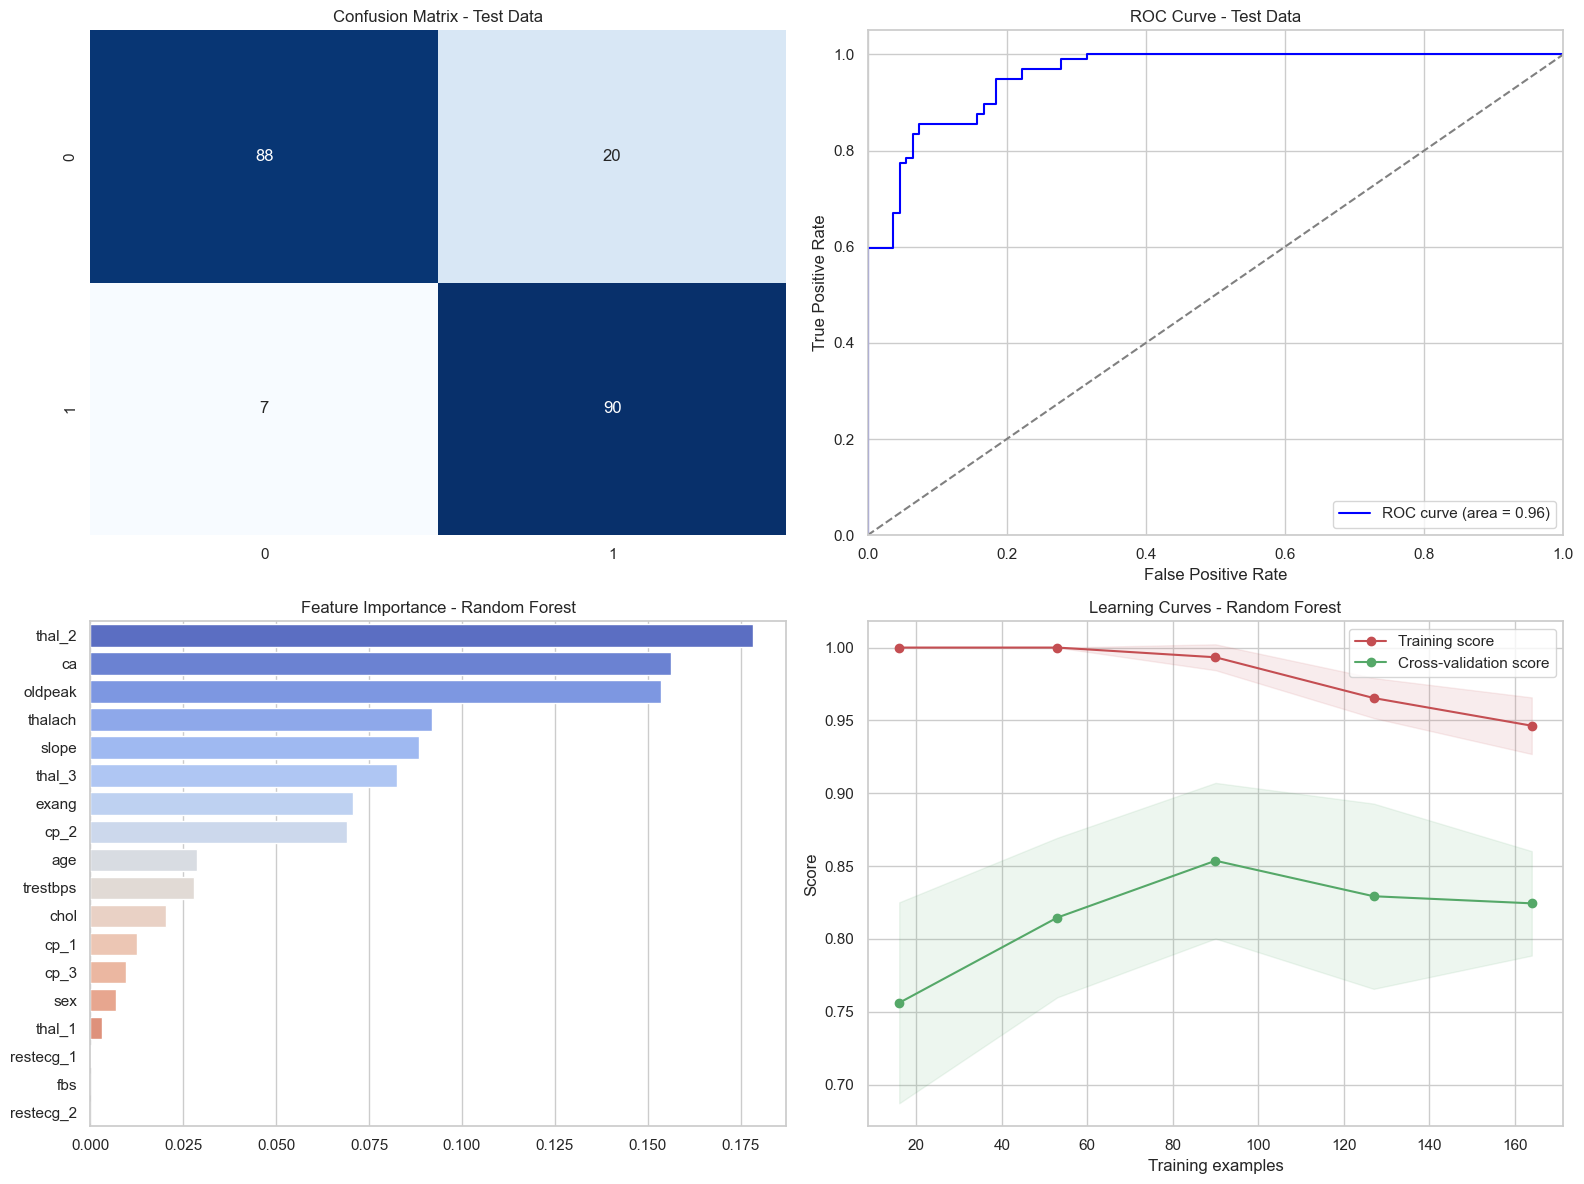

In [129]:
# Define the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot confusion matrix for test data
cm_rf_test = confusion_matrix(y_test, best_rf.predict(X_test_scaled))
sns.heatmap(cm_rf_test, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0, 0])
axes[0, 0].set_title('Confusion Matrix - Test Data')

# Plot ROC curve for test data
fpr_rf_test, tpr_rf_test, _ = roc_curve(y_test, best_rf.predict_proba(X_test_scaled)[:,1])
roc_auc_rf_test = auc(fpr_rf_test, tpr_rf_test)
axes[0, 1].plot(fpr_rf_test, tpr_rf_test, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_rf_test)
axes[0, 1].plot([0, 1], [0, 1], color='grey', linestyle='--')
axes[0, 1].set_xlim([0.0, 1.0])
axes[0, 1].set_ylim([0.0, 1.05])
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('ROC Curve - Test Data')
axes[0, 1].legend(loc="lower right")

# Plot feature importances for Random Forest
importances_rf = best_rf.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]
sns.barplot(x=importances_rf[indices_rf], y=X_test.columns[indices_rf], palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Feature Importance - Random Forest')

# Plot learning curve for Random Forest
train_sizes_rf, train_scores_rf, test_scores_rf = learning_curve(best_rf, X_test_scaled, y_test, cv=5)
train_scores_mean_rf = np.mean(train_scores_rf, axis=1)
train_scores_std_rf = np.std(train_scores_rf, axis=1)
test_scores_mean_rf = np.mean(test_scores_rf, axis=1)
test_scores_std_rf = np.std(test_scores_rf, axis=1)
axes[1, 1].fill_between(train_sizes_rf, train_scores_mean_rf - train_scores_std_rf,
                         train_scores_mean_rf + train_scores_std_rf, alpha=0.1, color="r")
axes[1, 1].fill_between(train_sizes_rf, test_scores_mean_rf - test_scores_std_rf,
                         test_scores_mean_rf + test_scores_std_rf, alpha=0.1, color="g")
axes[1, 1].plot(train_sizes_rf, train_scores_mean_rf, 'o-', color="r", label="Training score")
axes[1, 1].plot(train_sizes_rf, test_scores_mean_rf, 'o-', color="g", label="Cross-validation score")
axes[1, 1].set_title("Learning Curves - Random Forest")
axes[1, 1].set_xlabel("Training examples")
axes[1, 1].set_ylabel("Score")
axes[1, 1].legend(loc="best")

plt.tight_layout()
plt.show()

<a id="dt"></a>
# <p style="background-color:#de70af; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 8 | Logistic Regression</p>

⬆️ [Tabel of Contents](#contents_tabel)

<b><span style='color:#b23272'>Step 8.1 | LR Base Model Definition </span></b>


In [130]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

<b><span style='color:#b23272'>Step 8.2 | LR Model Evaluation </span></b>


In [139]:
y_pred_lr = lr_model.predict(X_test_scaled)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy_lr)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

Accuracy: 0.8585365853658536

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.75      0.85       108
           1       0.78      0.98      0.87        97

    accuracy                           0.86       205
   macro avg       0.88      0.86      0.86       205
weighted avg       0.88      0.86      0.86       205



<b><span style='color:#b23272'>Step 8.3 | LR Plots </span></b>


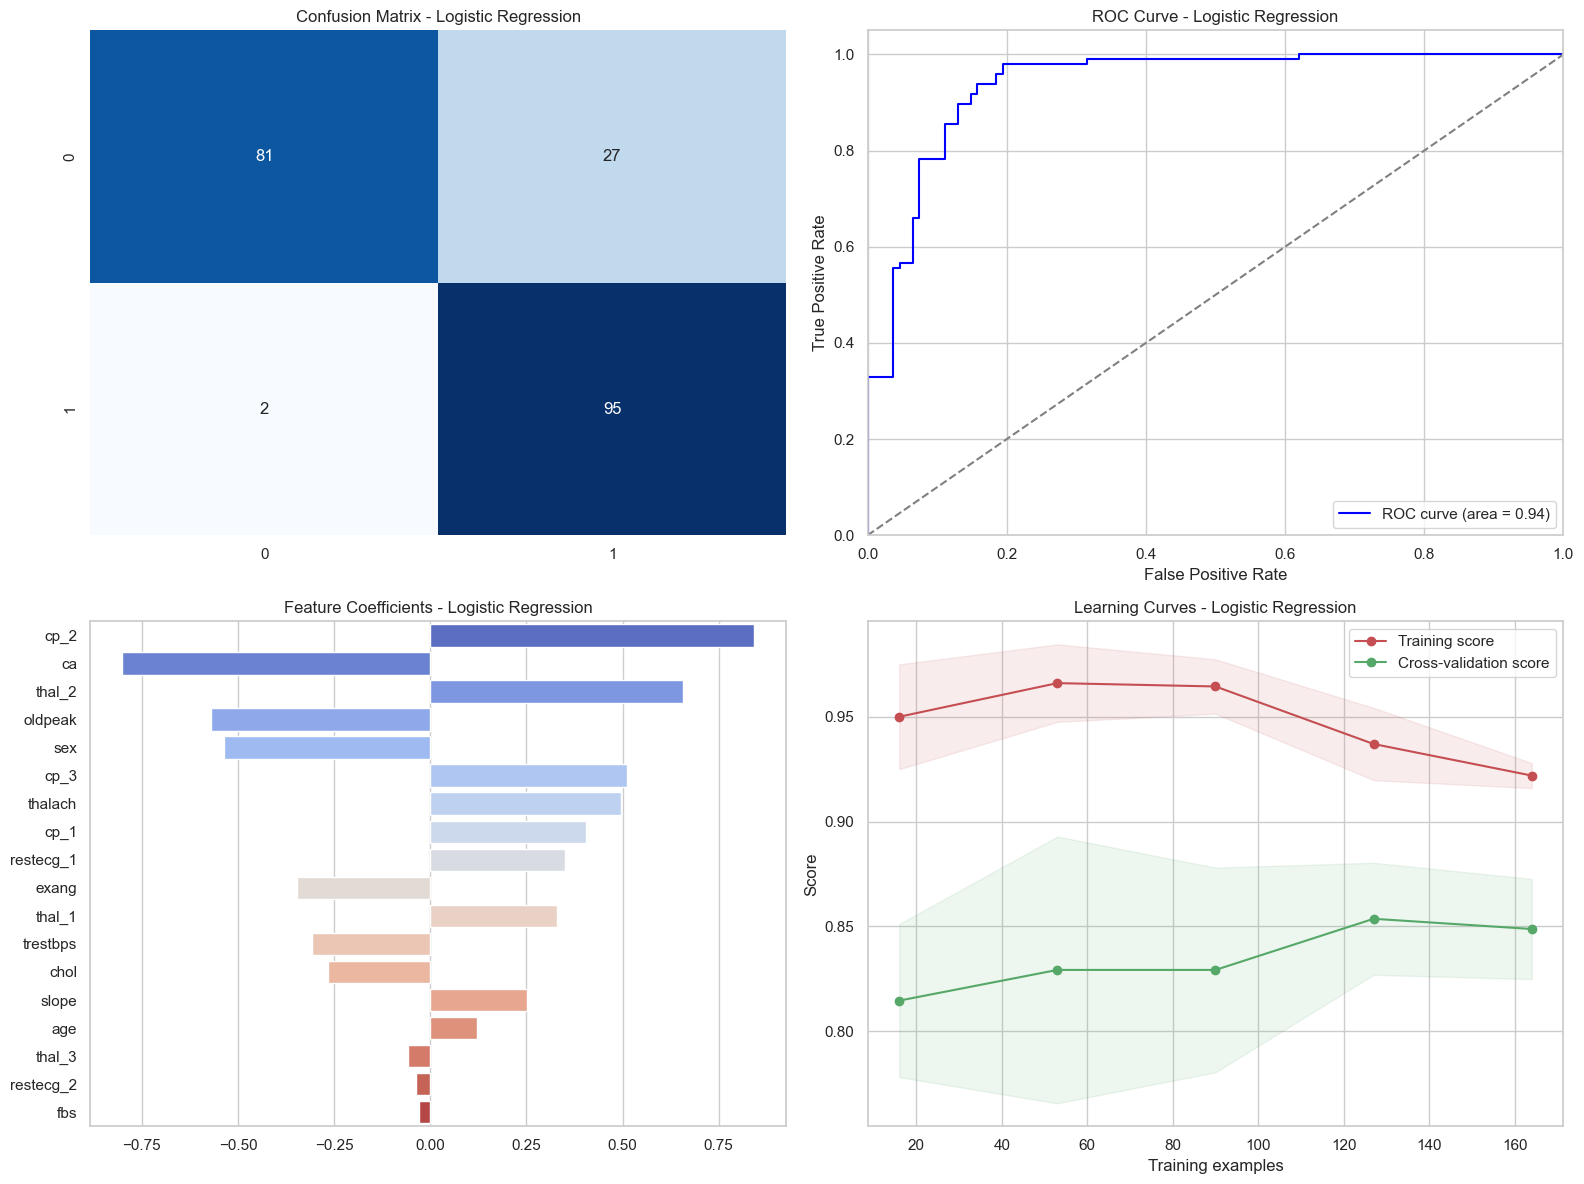

In [132]:
# Define the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot confusion matrix for test data
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0, 0])
axes[0, 0].set_title('Confusion Matrix - Logistic Regression')

# Plot ROC curve for test data
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_model.predict_proba(X_test_scaled)[:,1])
roc_auc_lr = auc(fpr_lr, tpr_lr)
axes[0, 1].plot(fpr_lr, tpr_lr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_lr)
axes[0, 1].plot([0, 1], [0, 1], color='grey', linestyle='--')
axes[0, 1].set_xlim([0.0, 1.0])
axes[0, 1].set_ylim([0.0, 1.05])
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('ROC Curve - Logistic Regression')
axes[0, 1].legend(loc="lower right")

# Plot feature coefficients for Logistic Regression
coefficients_lr = lr_model.coef_[0]
indices_lr = np.argsort(np.abs(coefficients_lr))[::-1]
sns.barplot(x=coefficients_lr[indices_lr], y=X_test.columns[indices_lr], palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Feature Coefficients - Logistic Regression')

# Plot learning curve for Logistic Regression
train_sizes_lr, train_scores_lr, test_scores_lr = learning_curve(lr_model, X_test_scaled, y_test, cv=5)
train_scores_mean_lr = np.mean(train_scores_lr, axis=1)
train_scores_std_lr = np.std(train_scores_lr, axis=1)
test_scores_mean_lr = np.mean(test_scores_lr, axis=1)
test_scores_std_lr = np.std(test_scores_lr, axis=1)
axes[1, 1].fill_between(train_sizes_lr, train_scores_mean_lr - train_scores_std_lr,
                         train_scores_mean_lr + train_scores_std_lr, alpha=0.1, color="r")
axes[1, 1].fill_between(train_sizes_lr, test_scores_mean_lr - test_scores_std_lr,
                         test_scores_mean_lr + test_scores_std_lr, alpha=0.1, color="g")
axes[1, 1].plot(train_sizes_lr, train_scores_mean_lr, 'o-', color="r", label="Training score")
axes[1, 1].plot(train_sizes_lr, test_scores_mean_lr, 'o-', color="g", label="Cross-validation score")
axes[1, 1].set_title("Learning Curves - Logistic Regression")
axes[1, 1].set_xlabel("Training examples")
axes[1, 1].set_ylabel("Score")
axes[1, 1].legend(loc="best")

plt.tight_layout()
plt.show()

#### 1) 
Training Score: The training score typically increases as the size of the training data increases. This is because the model     is learning from the data and fitting the training examples better.
Validation Score: The validation score ideally increases along with the training score, but to a lesser extent. This             indicates that the model is generalizing well to unseen data and not overfitting the training data.
#### 2)
The most important feature for the model is cp_2 also ca and cp2
#### 3)
This is the ideal shape for an ROC curve, indicating good model performance. The closer the curve is to the upper left corner, the better the model's performance at distinguishing between positive and negative cases.

<a id="dt"></a>
# <p style="background-color:#de70af; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 8 | Models Comparison</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [133]:
from sklearn.model_selection import cross_val_score

def compare_models(models, X, y, cv=5, scoring='accuracy'):
    results = {}
    for name, model in models.items():
        scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
        results[name] = scores
        print(f'{name}: Mean {scoring} = {scores.mean()}, Std = {scores.std()}')
    return results

In [134]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Comparer les modèles

In [135]:
results = compare_models(models, X_train_scaled, y_train)


Logistic Regression: Mean accuracy = 0.8451219512195122, Std = 0.01988964198817082
Random Forest: Mean accuracy = 0.9914634146341463, Std = 0.009125993626277914
Decision Tree: Mean accuracy = 0.9768292682926829, Std = 0.011177013890136204


Le modèle Random Forest a la meilleure précision moyenne parmi les trois, suivie par le modèle de forêt aléatoire, puis la régression logistique.

<a id="dt"></a>
# <p style="background-color:#de70af; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 9 | Case prediction</p>

⬆️ [Tabel of Contents](#contents_tabel)

Patient_1 Data to predict whether he has a Heart Disease or not.¶


In [141]:
patient_1_data = [[53, 1, 140,203, 1, 155,1 ,3.1, 0, 0,0,0,0,0,0,0,0,1]]

# Normaliser les données du patient
patient_1_data_scaled = scaler.transform(patient_1_data)  # Utilisez le même scaler que celui utilisé pour X_train_scaled

# Faire une prédiction
prediction = best_rf.predict(patient_1_data_scaled)
prediction

C:\Users\Nihel ZAIED\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

From prediction using best model it can be seen that the patient has no heart disease detected.


Patient_2 Data to predict whether he has a Heart Disease or not.¶


In [142]:
patient_2_data = [[50,0,110,254,0,159,0,0.0,2,0,0,0,0,0,0,0,1,0]]

# Normaliser les données du patient
patient_2_data_scaled = scaler.transform(patient_2_data)  # Utilisez le même scaler que celui utilisé pour X_train_scaled

# Faire une prédiction
prediction = best_rf.predict(patient_2_data_scaled)
prediction

C:\Users\Nihel ZAIED\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

From prediction using best model it can be seen that the patient has heart disease.


<a id="dt"></a>
# <p style="background-color:#de70af; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">| End of project | </p>

⬆️ [Tabel of Contents](#contents_tabel)